In [133]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from pathlib import Path
from brainage.dataset.dataset2d import SliceDataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
cfg = OmegaConf.load('../../config/config.yaml')

In [135]:
cfg

{'project': {'name': 'my-project', 'job': 'Adam-32-0.001'}, 'trainer': {'gpus': 1, 'max_epochs': 100, 'benchmark': True}, 'model': {'inputs': 1, 'outputs': 1}, 'optimizer': {'learning_rate': 0.0001, 'weight_decay': 0}, 'loader': {'batch_size': 128, 'num_workers': 8}, 'dataset': {'data': '${env:DATA}/nako/interim/t1_pp_10_slices_ax2_image.npy', 'info': '${env:DATA}/nako/interim/t1_pp_10_slices_ax2.feather', 'shape': [155, 185], 'train': '${env:DATA}/nako/interim/keys/train0.dat', 'val': '${env:DATA}/nako/interim/keys/test0.dat'}}

In [136]:
with Path(cfg.dataset.train).open('r') as f:
    train_keys = [l.strip() for l in f.readlines()]

with Path(cfg.dataset.val).open('r') as f:
    val_keys = [l.strip() for l in f.readlines()]

In [137]:
info_df = pd.read_feather(cfg.dataset.info)
shape = cfg.dataset.shape
data = np.memmap(cfg.dataset.data,
                    mode='r',
                    dtype=np.float16,
                    shape=(len(info_df), shape[0], shape[1]))

In [138]:

train_info_df = info_df[info_df['slice']==85]
train_info_df = train_info_df[train_info_df.key.isin(train_keys)]
ds_train = SliceDataset(data, train_info_df)

{'data': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float16), 'label': [66], 'slice': 85, 'key': '104520'}


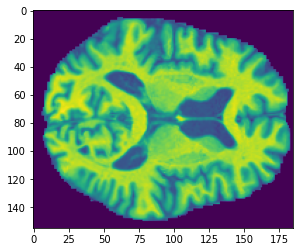

In [139]:
sample = ds_train[2000]
print(sample)
plt.imshow(sample['data'][0].astype(np.float32))

In [144]:
info_df[info_df['key']=='104520'][info_df['slice']==85]

,key,slice,age,sex
641630,104520,85,66,1


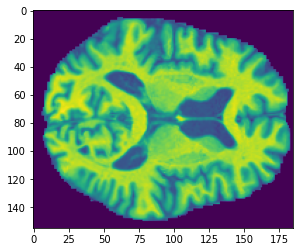

In [145]:
plt.imshow(data[641630].astype(np.float32))

In [146]:
import h5py
with h5py.File('/mnt/qdata/raheppt1/data/brainage/nako/interim/t1_pp_10_cropped.h5', 'r') as hf:
    img = hf['image']['104520'][:]

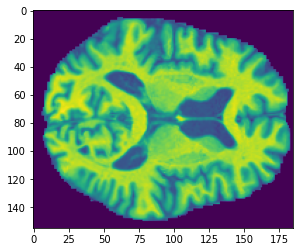

In [147]:
plt.imshow(img[:,:,85].astype(np.float32))

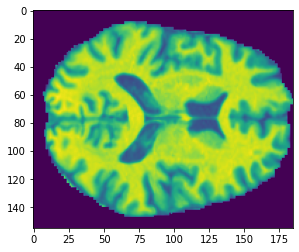

In [148]:
with h5py.File('/mnt/qdata/raheppt1/data/brainage/nako/interim/t1_pp_10_slices_ax2.h5', 'r') as hf:
    plt.imshow(hf['image'][641630].astype(np.float32))

In [149]:
test = pd.read_csv('/mnt/qdata/raheppt1/data/brainage/nako/interim/nako_age_labels.csv')
print(test[test['key']==104520])

key  age  sex
4405  104520   66    1
